Two weeks ago, you were presented with a classic problem of probability manipulation: You had two buckets and 100 ping-pong balls, 50 of which were red and 50 of which were blue. You were meant to arrange the balls into the two buckets however you liked, but each bucket needed at least one ball. Your friend would then blindly choose one of the two buckets and select a ball at random from the chosen bucket. How could you arrange the balls to maximize the probability that your friend chosen a red ball? What probability of success do you achieve?

Your friend achieves the greatest chance of drawing a red ball by placing a single red ball in one bucket and all the other balls in the other bucket. This gives a 50 percent chance he’ll draw a red ball for sure and a 50 percent chance he’ll have a 49/99 chance at a red ball. Summing that up: 0.5*(1) + 0.5*(49/99) = about a 74.7 percent chance he’ll draw a red ball.

For extra credit, you were asked the same question but for 25 and 200 balls of each color. The solution idea is the same, and the calculations are similar.

For 25 balls of each color: 0.5 + 0.5*(24/49) = about a 74.5 percent chance.

For 200 balls of each color: 0.5 + 0.5*(99/199) = about a 74.9 percent chance.

# How can I make this an optimization problem?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
%matplotlib inline

In [27]:
def prob(param):
    n_red1,n_blue1 = param
     
    #print(n_red1,n_blue1)
    
    n_total = 100
    n_red = 50
    n_blue = n_total - n_red
    
    n_red2 = n_red - n_red1
    n_blue2 = n_blue - n_blue1
    
    p_red = 0.5 * (n_red1 / (n_red1 + n_blue1)) + 0.5 * (n_red2 / (n_red2 + n_blue2))
    return 1- p_red

In [28]:
res = np.zeros((50,50))
for ii,a in enumerate(x_red):
    for jj,b in enumerate(x_blue):
        res[ii,jj] = prob((a,b))
res = pd.DataFrame(res,index= np.arange(1,51),columns=np.arange(1,51))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


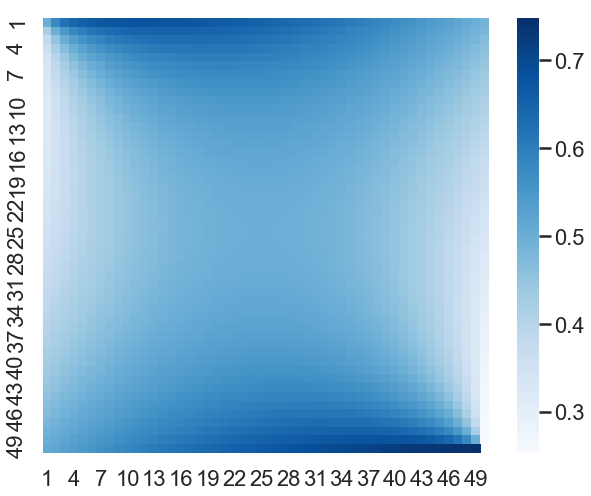

In [29]:
fig,ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(res,ax = ax, cmap=plt.cm.Blues,)

In [30]:
from hyperopt import fmin, tpe, hp

In [88]:
space = [hp.quniform('x',1,49,1),hp.quniform('y',0,50,1,)]

In [90]:
np.random.seed(12345)
best = fmin(fn=prob,
    space=space,
    algo=tpe.suggest,
    max_evals=int(1e3))

100%|███████| 1000/1000 [00:53<00:00,  7.02it/s, best loss: 0.2525252525252525]


In [91]:
best

{'x': 1.0, 'y': 0.0}